In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import mannwhitneyu

In [3]:
df = pd.read_csv('/Users/svolkova/Desktop/productAnalytic/projects/cats_ab_test/cookie_cats.csv')
df.head(10)



,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [4]:
# Missing values?
df.isnull().mean() * 100
# No missing values

userid            0.0
version           0.0
sum_gamerounds    0.0
retention_1       0.0
retention_7       0.0
dtype: float64

In [13]:
# Is the distibution uniform? 
print(df['version'].value_counts(normalize=True) * 100)
# The distibution is uniform

version
gate_40    50.437415
gate_30    49.562585
Name: proportion, dtype: float64


In [6]:
from scipy.stats import chisquare

observed = df['version'].value_counts().values
chi2_stat, p_val = chisquare(observed)
print(f"Chi2: {chi2_stat:.4f}, p-value: {p_val:.4f}")

Chi2: 6.9024, p-value: 0.0086


In [7]:
# Overlaps? 
df.duplicated(subset='userid').sum()
# No overlaps


0

In [8]:
# Conversion rate for each group
conv_1 = df.groupby('version')['retention_1'].mean() 
conv_7 = df.groupby('version')['retention_7'].mean() 
print('Retention day 1: ')
print(conv_1)
print('Retention day 7: ')
print(conv_7)

Retention day 1: 
version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64
Retention day 7: 
version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64


In [9]:
avg_rounds = df.groupby('version')['sum_gamerounds'].mean()
print('Average engagement \n', avg_rounds)

Average engagement 
 version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64


In [10]:
print('Percentage of active users')
df[df['sum_gamerounds'] > 0].groupby('version')['userid'].count()

Percentage of active users


version
gate_30    42763
gate_40    43432
Name: userid, dtype: int64

In [11]:
from scipy.stats import levene

group30 = df[df['version'] == 'gate_30']['sum_gamerounds']
group40 = df[df['version'] == 'gate_40']['sum_gamerounds']

stat, p = levene(group30, group40)
print(f"Levene's test statistic: {stat}")
print(f"p-value: {p}")

# p > 0,05 - homogeneity ok 

Levene's test statistic: 0.5292002638313259
p-value: 0.46694516772623273


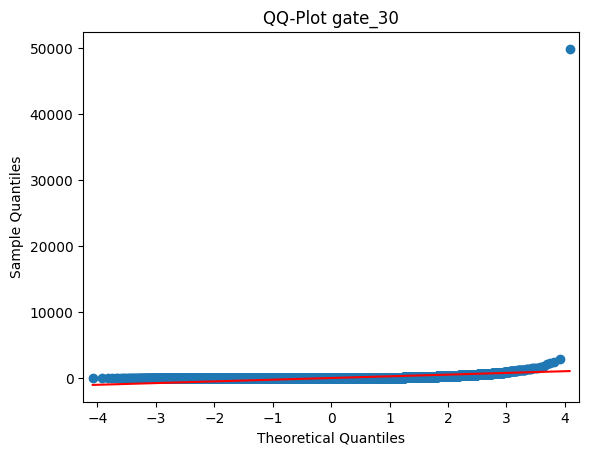

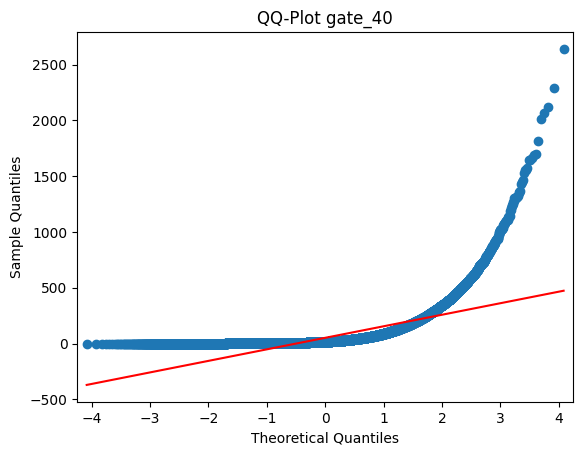

In [15]:
# QQ plot для gate_30
sm.qqplot(group30, line='s')
plt.title('QQ-Plot gate_30')
plt.show()

# QQ plot для gate_40
sm.qqplot(group40, line='s')
plt.title('QQ-Plot gate_40')
plt.show()

In [ ]:
# The normality of the distribution is disrupted
# Further I use Mann-Whitney U test for Statistical test
# bootstrap for Confidence interval

In [ ]:
stat, p = mannwhitneyu(group30, group40, alternative='two-sided')
print(f"Mann-Whitney U statistic: {stat}")
print(f"p-value: {p}")

Mann-Whitney U statistic: 1024331250.5
p-value: 0.05020880772044255


In [ ]:
# p-value ≥ 0.05 
# there is no statistically significant difference in the number of game rounds between the gate_30 and gate_40 groups
# the p-value is close to the threshold, indicating a possible trend
# that may require further investigation

In [ ]:
# Confidence interval
# bootstrap:
def bootstrap_ci(data, num_bootstrap=10000, ci=95):
    boot_means = []
    for _ in range(num_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    lower = np.percentile(boot_means, (100 - ci) / 2)
    upper = np.percentile(boot_means, 100 - (100 - ci) / 2)
    return round(lower, 2), round(upper, 2)

ci_30 = bootstrap_ci(group30)
ci_40 = bootstrap_ci(group40)

print("95% CI for gate_30:", ci_30)
print("95% CI for gate_40:", ci_40)

95% CI for gate_30: (50.62, 55.16)
95% CI for gate_40: (50.35, 52.22)


/var/folders/75/ss0qcr9161d0_pl20ccbncy40000gp/T/ipykernel_79731/3055903266.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='version', y='sum_gamerounds', ci=95, capsize=0.2, palette='pastel')
/var/folders/75/ss0qcr9161d0_pl20ccbncy40000gp/T/ipykernel_79731/3055903266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='version', y='sum_gamerounds', ci=95, capsize=0.2, palette='pastel')


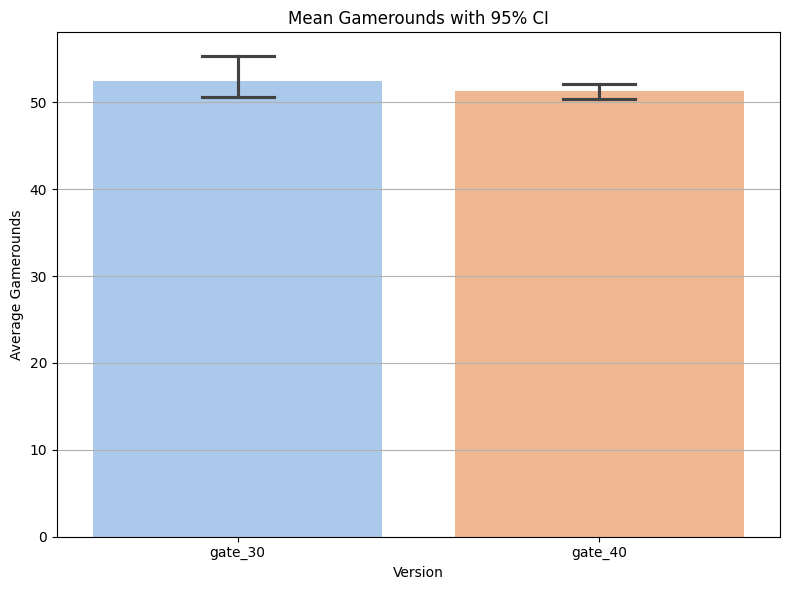

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='version', y='sum_gamerounds', ci=95, capsize=0.2, palette='pastel')
plt.title('Mean Gamerounds with 95% CI')
plt.ylabel('Average Gamerounds')
plt.xlabel('Version')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# marginal evidence for a difference in performance between the two versions.